In [1]:
# Load libraries
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt
import urllib
from pathlib import Path
import os
import urllib
#import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

pd.options.display.max_columns = 50

In [2]:
relative_path = '/raw/train.csv'
train_path = '/raw/train.csv'

cur_wd = os.getcwd()

file_path = cur_wd + relative_path


In [3]:
def load_set_data(target_month, outlier_cutoff, income_cutoff, path):
    relative_path = path
    cur_wd = os.getcwd()
    file_path = cur_wd + relative_path

    if not Path(file_path).exists():
        print('Filepath does not exist in the "raw" folder. Check again')
        
    else:
        print('Loading and cleaning data.')

    d_types = {'ID': str, 'Customer_ID': str, 'Month': str, 'Name': str, 'Age': int, 'SSN': str, 'Occupation': str, 'Annual_Income': str, 'Monthly_Inhand_Salary': float, 'Num_Bank_Accounts': int, 'Num_Credit_Card': int, 'Interest_Rate': int, 'Num_of_Loan': int,'Type_of_Loan': str,
'Delay_from_due_date': int, 'Num_of_Delayed_Payment': int, 'Changed_Credit_Limit': float, 'Num_Credit_Inquiries': float, 'Credit_Mix': str, 'Outstanding_Debt': str, 'Credit_Utilization_Ratio': float, 'Credit_History_Age': float, 'Payment_of_Min_Amount': str, 'Total_EMI_per_month': float,
       'Amount_invested_monthly': float, 'Payment_Behaviour': str, 'Monthly_Balance':float, 'Credit_Score':str}


    df = pd.read_csv(file_path)
    
    # Data cleaning, type conversion and filtering DataFrame
    # remove underscores and convert 'Annual Income' column from string to float
    df['Annual_Income'] = df['Annual_Income'].str.replace('_', '').astype(float) 

    # filter out rows where 'Num_Credit_Inquiries' is blank and convert to integer
    df = df[df['Num_Credit_Inquiries'].notna()]
    df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].astype(int)
    
    # filter out rows where 'Credit_Mix' has underscores
    df = df[~df['Credit_Mix'].str.contains('_')]

    # remove underscores and convert 'Outstanding_Debt' column from string to float
    df['Outstanding_Debt'] = df['Outstanding_Debt'].str.replace('_', '').astype(float)

    # no changes required for "Credit_Utilization_Ratio"

    # further filtering based on specific conditions
    df['Amount_invested_monthly'] = df['Amount_invested_monthly'].str.replace('_', '').astype(float)
    single_month_frame = df[df['Month'] ==  target_month]
    single_month_frame = single_month_frame[single_month_frame['Type_of_Loan'] !=  'Auto Loan']
    single_month_frame = single_month_frame[single_month_frame['Amount_invested_monthly'] < outlier_cutoff]
    single_month_frame = single_month_frame[single_month_frame['Annual_Income'] < income_cutoff]
    

    return single_month_frame

In [4]:
# checking data cleaning, type conversion and filtering DataFrame for April

# Load data for April with specified cutoffs
target_month = 'April'
outlier_cutoff = 10000
income_cutoff = 1000000
path = train_path

# Call the function to get the filtered DataFrame
april_data = load_set_data(target_month, outlier_cutoff, income_cutoff, path)

# Print the number of rows
print(f'Number of rows for {target_month}:', len(april_data))

Loading and cleaning data.
Number of rows for April: 8782


C:\Users\adith\AppData\Local\Temp\ipykernel_14908\4217207163.py:17: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


END OF CLEAN.

### Starting Deep Learning model

In [5]:
file_path_cs_class =  'raw/train.csv' 

pd_cs_class = pd.read_csv(file_path_cs_class)

C:\Users\adith\AppData\Local\Temp\ipykernel_14908\391738695.py:3: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  pd_cs_class = pd.read_csv(file_path_cs_class)


In [6]:
    # Data cleaning, type conversion and filtering DataFrame
# remove underscores and convert 'Annual Income' column from string to float
pd_cs_class['Annual_Income'] = pd_cs_class['Annual_Income'].str.replace('_', '').astype(float) 

# filter out rows where 'Num_Credit_Inquiries' is blank and convert to integer
pd_cs_class = pd_cs_class[pd_cs_class['Num_Credit_Inquiries'].notna()]
pd_cs_class['Num_Credit_Inquiries'] = pd_cs_class['Num_Credit_Inquiries'].astype(int)

# filter out rows where 'Credit_Mix' has underscores
pd_cs_class = pd_cs_class[~pd_cs_class['Credit_Mix'].str.contains('_')]

# remove underscores and convert 'Outstanding_Debt' column from string to float
pd_cs_class['Outstanding_Debt'] = pd_cs_class['Outstanding_Debt'].str.replace('_', '').astype(float)


pd_cs_class = pd_cs_class[pd_cs_class['Annual_Income'] < income_cutoff]

In [7]:
pd_cs_class.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4,9.27,4,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8_,11.27,4,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6,11.27,4,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,4,5.42,2,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,7,1,7.42,2,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good
11,0x1611,CUS_0x21b1,April,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,NaN,2,4,6,1,Credit-Builder Loan,3,3_,5.42,2,Good,605.03,39.182656,26 Years and 10 Months,No,18.816215,99.30622796053305,Low_spent_Medium_value_payments,465.6762241330048,Good


In [8]:
features = ['Annual_Income','Num_Credit_Inquiries','Outstanding_Debt','Annual_Income',
            'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 
            'Delay_from_due_date', 'Num_Credit_Inquiries', 'Credit_Utilization_Ratio', 'Total_EMI_per_month' ]

scaler = MinMaxScaler()
pd_cs_class[features] = scaler.fit_transform(pd_cs_class[features])

In [9]:
df_X = pd_cs_class[features]

In [10]:
df_y = pd_cs_class['Credit_Score']
cs_mapping = {
    'Good': 2,
    'Standard': 1,
    'Poor': 0
}
df_y = df_y.map(cs_mapping)

In [11]:

x_train, x_test, y_train, y_test = train_test_split(df_X,df_y,test_size=0.3,random_state=42)

In [12]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import utils
from tensorflow.keras import optimizers

# Set random seed for reproducability
tensorflow.random.set_seed(0)

print("Libraries imported.")
print('Keras version:',keras.__version__)
print('TensorFlow version:',tensorflow.__version__)

Libraries imported.
Keras version: 2.10.0
TensorFlow version: 2.10.0


In [13]:
# Set data types for float features
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Set data types for categorical labels
y_train = utils.to_categorical(y_train, num_classes = 3)
y_test = utils.to_categorical(y_test, num_classes = 3)
print('Ready...')

Ready...


In [14]:
# Define a classifier network

model = Sequential()
# Input layer
model.add(Dense(128, activation='relu', input_shape=(len(features),)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Hidden layer 1
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

# Hidden layer 2
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Hidden layer 3
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Output layer
model.add(Dense(3, activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1664      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 256)               0

In [19]:
#hyper-parameters for optimizer
learning_rate = 0.001
opt = optimizers.Adam(lr=learning_rate)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# Train the model over 50 epochs using 10-observation batches and using the test holdout dataset for validation
num_epochs = 5
history = model.fit(x_train, y_train, epochs=num_epochs, batch_size=10, validation_data=(x_test, y_test))

Epoch 1/5


c:\Users\adith\miniconda3\envs\dsi_participant\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


5423/5423 [==============================] - 19s 3ms/step - loss: 1.0068 - accuracy: 0.5317 - val_loss: 1.0048 - val_accuracy: 0.5303
Epoch 2/5
5423/5423 [==============================] - 20s 4ms/step - loss: 1.0047 - accuracy: 0.5320 - val_loss: 1.0100 - val_accuracy: 0.5303
Epoch 3/5
5423/5423 [==============================] - 22s 4ms/step - loss: 1.0035 - accuracy: 0.5320 - val_loss: 1.0046 - val_accuracy: 0.5303
Epoch 4/5
5423/5423 [==============================] - 24s 4ms/step - loss: 1.0026 - accuracy: 0.5320 - val_loss: 1.0044 - val_accuracy: 0.5303
Epoch 5/5
5423/5423 [==============================] - 21s 4ms/step - loss: 1.0022 - accuracy: 0.5320 - val_loss: 1.0045 - val_accuracy: 0.5303


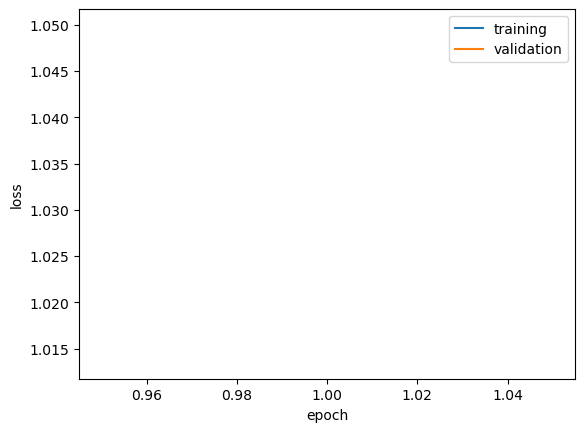

In [16]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [17]:
for layer in model.layers:
    if hasattr(layer, 'get_weights') and len(layer.get_weights()) > 0:
        weights_and_biases = layer.get_weights()
        print('------------\nLayer:', layer.name)
        for i, w in enumerate(weights_and_biases):
            if i == 0:
                print('Weights:\n', w)
            else:
                print('Biases/Other Parameters:\n', w)

------------
Layer: dense
Weights:
 [[-0.11582014 -0.0364736  -0.0642252  ... -0.06418821  0.09522502
  -0.20577902]
 [ 0.02588084  0.11818086 -0.11075416 ...  0.03514471 -0.01009092
   0.17448421]
 [-0.10710069 -0.19068915 -0.0004464  ...  0.19878556  0.00494778
  -0.05123548]
 ...
 [-0.0030359   0.11168297  0.08115233 ... -0.11400234  0.1202482
   0.1705813 ]
 [-0.1063073   0.10902893 -0.16520154 ... -0.1351735  -0.08560541
   0.13383242]
 [-0.14490703 -0.01704464 -0.16491292 ...  0.1909486  -0.16609628
  -0.17344484]]
Biases/Other Parameters:
 [-0.00738023 -0.00844979  0.0055588  -0.00555881 -0.00149243 -0.00373809
  0.00359872  0.          0.00158972 -0.00575261 -0.00679799  0.00556821
  0.00425029 -0.00554036  0.00635124 -0.00846578  0.00675467 -0.00708456
  0.00555882  0.00555885  0.00512901  0.          0.00677134  0.
 -0.0010502  -0.0037825   0.00537432  0.00230862  0.00788523  0.00841021
 -0.00362025  0.          0.00799178  0.00264876  0.          0.
  0.          0.         

727/727 [==============================] - 1s 1ms/step


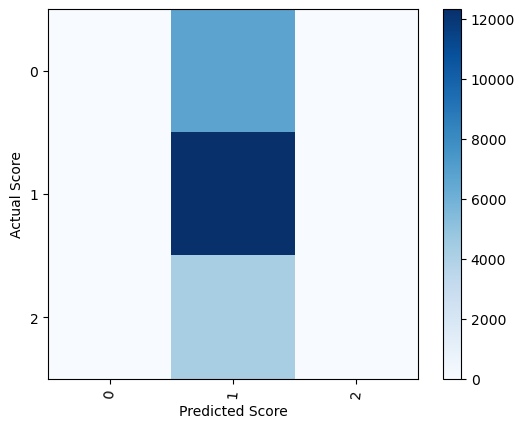

In [18]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline


class_probabilities = model.predict(x_test)
predictions = np.argmax(class_probabilities, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(3)
plt.xticks(tick_marks,  rotation=85)
plt.yticks(tick_marks, )
plt.xlabel("Predicted Score")
plt.ylabel("Actual Score")
plt.show()